In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
import os
homeDir= "C:/Users/Galytix/Downloads/data_r/AI_Repo/Python/project_1"
if(os.getcwd() != homeDir):
    os.chdir(homeDir)
print("your current directory is : ")
print(os.getcwd())
    

your current directory is : 
C:\Users\Galytix\Downloads\data_r\AI_Repo\Python\project_1


In [12]:
#####################################
# Libraries
#####################################
# Common libs
import pandas as pd
import numpy as np
import sys
import os
import random
from pathlib import Path

# Image processing
import imageio
import skimage
import skimage.io
import skimage.transform
#from skimage.transform import rescale, resize, downscale_local_mean

# Charts
import matplotlib.pyplot as plt
import seaborn as sns


# ML
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics

#from sklearn.preprocessing import OneHotEncoder
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import tensorflow


In [13]:
# Set random seed to make results reproducable
np.random.seed(42)
tensorflow.set_random_seed(42)

# global variables 
img_folder = "Deep_learning/data/honey-bee-annotated-images/bee_imgs/bee_imgs/"
img_width = 100
img_height = 100
img_channels = 3


In [15]:
# =============================================================================
# Read Bee data
# =============================================================================
bees = pd.read_csv("Deep_learning/data/honey-bee-annotated-images/bee_data.csv",index_col = False,
                    parse_dates = {"datetime":[1,2]},
                    dtype = {'subspecies':'category', 'health':'category','caste':'category'})
 

In [16]:
# =============================================================================
#  Read and resize img, adjust channels. 
#  Caution: This function is not independent, it uses global vars: img_folder, img_channels
#  @param file: file name without full path
# =============================================================================

def read_img(file):
    # file = "001_043.png"
    img = skimage.io.imread(img_folder+file)
    img = skimage.transform.resize(img,(img_width, img_height),mode = "reflect")
    return img[:,:,:img_channels]

In [17]:
# dropping nas
bees.dropna(inplace=True)
img_exists = bees['file'].apply(lambda f: os.path.exists(img_folder + f))
bees = bees[img_exists]
bees.head()


,datetime,file,location,zip code,subspecies,health,pollen_carrying,caste
0,2018-08-28 16:07:00,041_066.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,2018-08-28 16:07:00,041_072.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,2018-08-28 16:07:00,041_073.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,2018-08-28 16:07:00,041_067.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,2018-08-28 16:07:00,041_059.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'SubSpecies')

Text(0, 0.5, 'location')

Text(0.5, 1.0, 'count')

Text(0, 0.5, 'caste')

Text(0.5, 1.0, 'count')

Text(0, 0.5, 'health')

Text(0.5, 1.0, 'count')

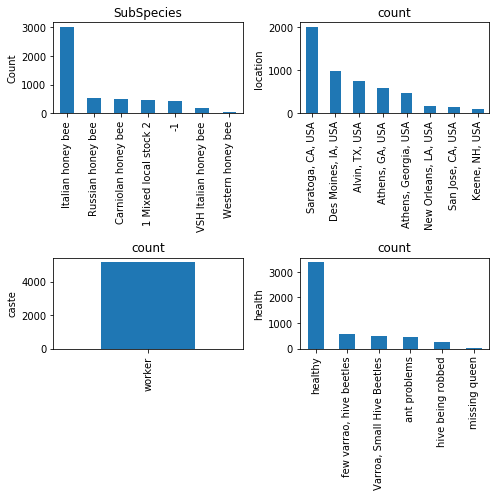

In [18]:
# =============================================================================
# Distribution of bees by categories
# =============================================================================
f,ax=plt.subplots(nrows=2,ncols=2,figsize = (7,7))
bees.subspecies.value_counts().plot(kind="bar",ax=ax[0,0])
ax[0,0].set_ylabel('Count')
ax[0,0].set_title("SubSpecies")

bees.location.value_counts().plot(kind="bar",ax=ax[0,1])
ax[0,1].set_ylabel("location")
ax[0,1].set_title("count")

bees.caste.value_counts().plot(kind ="bar",ax=ax[1,0])
ax[1,0].set_ylabel("caste")
ax[1,0].set_title("count")

bees.health.value_counts().plot(kind="bar", ax= ax[1,1])
ax[1,1].set_ylabel("health")
ax[1,1].set_title("count")

f.subplots_adjust(hspace = 0.7)
f.tight_layout()


In [19]:
# =============================================================================
# Subspecies of Bee
# =============================================================================
subspecies = bees.subspecies.cat.categories
subspecies.values


array(['-1', '1 Mixed local stock 2', 'Carniolan honey bee',
       'Italian honey bee', 'Russian honey bee', 'VSH Italian honey bee',
       'Western honey bee'], dtype=object)